**Load Dataset**

In [9]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

**Input and Target data**

In [10]:
y = dataset.target
X = dataset.data

**Shapes of dataset**

In [11]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


**Train Test Splition**

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

**Train and Test Shapes**

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


**Performance of KNN**
* k = {1,2,3,4,5}

K:  1
Accuracy: 0.895
K:  2
Accuracy: 0.902
K:  3
Accuracy: 0.909
K:  4
Accuracy: 0.916
K:  5
Accuracy: 0.902


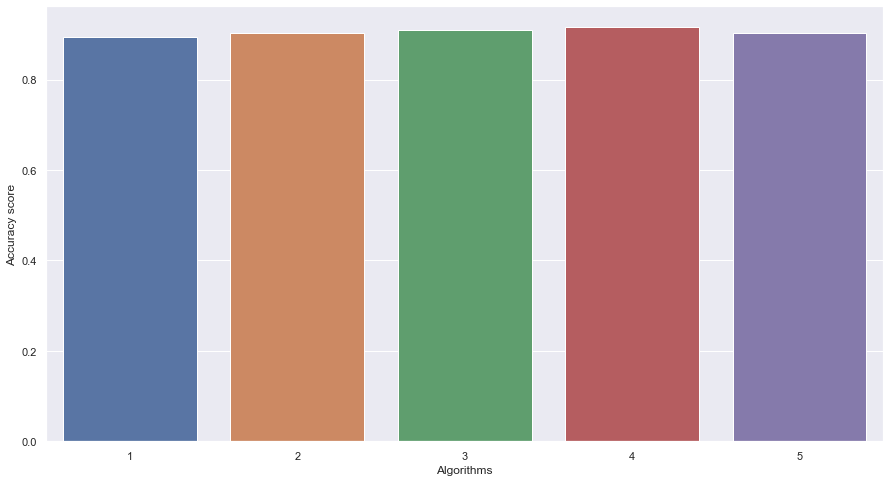

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

K_values = []
Acc_test = []
loss_test = []

for i in range(1,6):   
    # creating model
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    loss = 1 - acc
    
    # Storing data
    K_values.append(i)
    Acc_test.append(acc)
    loss_test.append(loss)
    
    # Printing scores
    print('K: ',i)
    print('Accuracy: %.3f' % acc)
    
import pandas as pd

results = pd.DataFrame()
results['K_value'] = K_values
results['Accuracy_train'] = Acc_test

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(results['K_value'].values,results['Accuracy_train'].values)
plt.savefig("KNN.jpg")

**Best Accuracy over K value is 4**

**Performance of Decision tree Classifier**
* max depth of tree is {1,2,3,4}

max_depth:  1
Accuracy: 0.895
max_depth:  2
Accuracy: 0.937
max_depth:  3
Accuracy: 0.923
max_depth:  4
Accuracy: 0.923


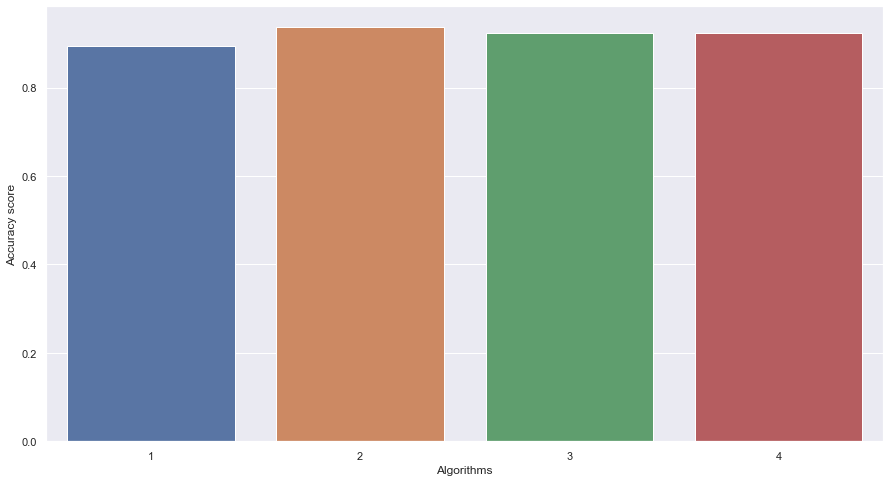

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

max_depth_value = []
Acc_test = []
loss_test = []

for i in range(1,5):   
    # creating model
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    loss = 1 - acc
    
    # Storing data
    max_depth_value.append(i)
    Acc_test.append(acc)
    loss_test.append(loss)
    
    # Printing scores
    print('max_depth: ',i)
    print('Accuracy: %.3f' % acc)

import pandas as pd

results = pd.DataFrame()
results['max_depth'] = max_depth_value
results['Accuracy_test'] = Acc_test

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(results['max_depth'].values,results['Accuracy_test'].values)
plt.savefig("DT.jpg")

Max Depth value for Decision tree is 2 
* Accuracy is 93.7

**Performace over the Random Forest Classifier**
* max depth value is {1,2,3}

max_depth:  1
Accuracy: 0.881
max_depth:  2
Accuracy: 0.916
max_depth:  3
Accuracy: 0.944


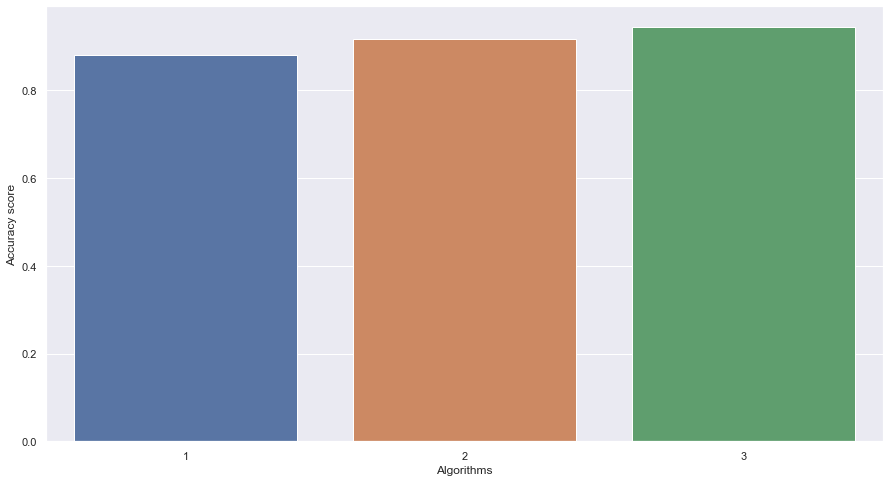

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

max_depth_value = []
Acc_test = []
loss_test = []

for i in range(1,4):   
    # creating model
    model = RandomForestClassifier(max_depth=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    loss = 1 - acc
    
    # Storing data
    max_depth_value.append(i)
    Acc_test.append(acc)
    loss_test.append(loss)
    
    # Printing scores
    print('max_depth: ',i)
    print('Accuracy: %.3f' % acc)

import pandas as pd

results = pd.DataFrame()
results['max_depth'] = max_depth_value
results['Accuracy_test'] = Acc_test

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(results['max_depth'].values,results['Accuracy_test'].values)
plt.savefig('rf.jpg')

* Accuracy score is 94% at maxdepth value is 3

In [20]:
algorithms = ['KNN','Decision tree','Random Forest']
Best_classifiers = [KNeighborsClassifier(n_neighbors= 3),DecisionTreeClassifier(max_depth=3),RandomForestClassifier(max_depth=3)]

In [24]:
for i in range(len(algorithms)):
    Best_classifiers[i].fit(X_train,y_train)
    y_pred = Best_classifiers[i].predict(X_test)
    scores = accuracy_score(y_test, y_pred)*100
    
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(int(scores))+" %")

The accuracy score achieved using KNN is: 93 %
The accuracy score achieved using Decision tree is: 93 %
The accuracy score achieved using Random Forest is: 94 %


**Combining the models to singal model for best performance**

In [40]:
# Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

seed = 7
kfold = KFold(n_splits=10, random_state=seed)


# create the sub models
estimators = []

model1 = KNeighborsClassifier(n_neighbors = 3)
estimators.append(('KNN', model1))

model2 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('Decision tree', model2))

model3 = RandomForestClassifier(max_depth=3)
estimators.append(('Random Forest', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)

print(results.mean())

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9473370927318296
